<a href="https://colab.research.google.com/github/WesselBoi/Suicidal-Content-detection/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
import seaborn as sns

In [ ]:
# Change to your own directory
try:
    os.chdir("/content/drive/MyDrive/SuicideModel")
    print("Directory changed")
except OSError:
    print("Error: Can't change the Current Working Directory")

Directory changed


In [ ]:
# Load dataset
cleaned_df = pd.read_csv('Data/suicide_detection_full_cleaned.csv')
cleaned_df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know girl fee...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fuck god annoying
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,lose hello adam struggle year afraid past year...


In [ ]:
cleaned_df.shape

(232074, 3)

In [ ]:
# Remove NaN rows first
cleaned_df = cleaned_df[cleaned_df['cleaned_text'].notnull()]
# Then remove empty texts
cleaned_df = cleaned_df[cleaned_df['cleaned_text'].apply(lambda x: len(x.split()) != 0)]
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df.head()


,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know girl fee...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fuck god annoying
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,lose hello adam struggle year afraid past year...


In [ ]:
cleaned_df.shape

(231926, 3)

In [ ]:
# Obtain word frequency
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_df['cleaned_text'])
word_freq = pd.DataFrame(tokenizer.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)


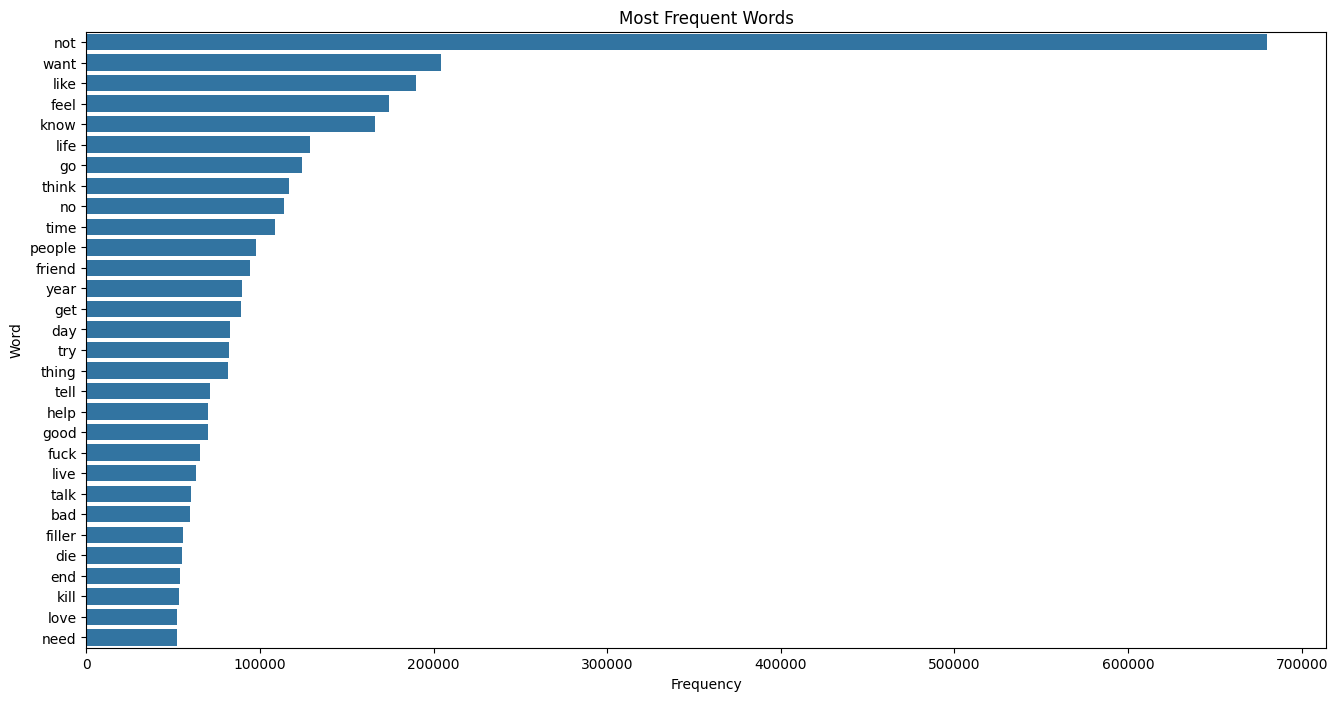

In [ ]:
# Plot bar graph for word frequency
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq.iloc[:30])
plt.title('Most Frequent Words')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

In [ ]:
# Removed anomalous "filler" word
cleaned_df['cleaned_text'] = cleaned_df['cleaned_text'].str.replace('filler', '')

In [ ]:
cleaned_df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know girl fee...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fuck god annoying
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,lose hello adam struggle year afraid past year...


#Remove outliers in word count of texts

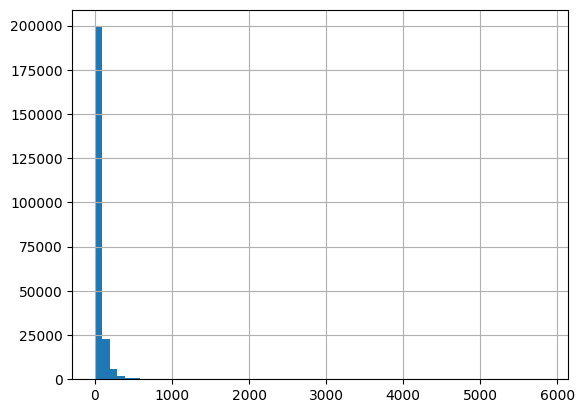

count    231926.000000
mean         51.736627
std          85.469436
min           0.000000
25%          11.000000
50%          24.000000
75%          61.000000
max        5850.000000
dtype: float64


In [ ]:
# Get word count of posts
posts_len = [len(x.split()) for x in cleaned_df['cleaned_text']]
pd.Series(posts_len).hist(bins=60)
plt.show()
print(pd.Series(posts_len).describe())


In [ ]:
# Subset dataset to obtain rows with less than or equal to 61 words
cleaned_df = cleaned_df[cleaned_df['cleaned_text'].apply(lambda x: len(x.split()) <= 61)]
cleaned_df.reset_index(drop=True, inplace=True)

In [ ]:
# Check dataset
cleaned_df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know girl fee...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fuck god annoying
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight not anymore quit


In [ ]:
cleaned_df.shape

(174852, 3)

In [ ]:
# Export cleaned dataset
cleaned_df.to_csv('/content/drive/MyDrive/SuicideModel/Data/suicide_detection_final_cleaned.csv', index=False)